In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

In [42]:
movies = pd.read_csv('../../movie_metadata.csv');

# Q1

### Plot the histogram of movie durations. Note: plot only movies with a duration of less than or equal to 240 minutes. Use a bin size of 30.

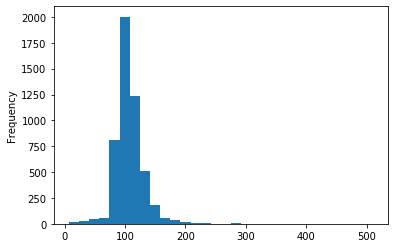

In [43]:
movies.duration.plot.hist(bins=30)

# Q2

### Generate a side-by-side box plot to show the distribution of the number of critic reviews on four rating categories: PG-13, PG, G, and R. What insights can you get from the plot?

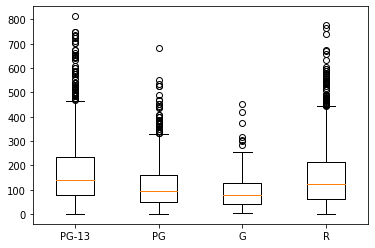

In [44]:
pg_thirteen_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'PG-13']['num_critic_for_reviews'])
pg_thirteen_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), pg_thirteen_movies_critic_reviews))

pg_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'PG']['num_critic_for_reviews'])
pg_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), pg_movies_critic_reviews))

g_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'G']['num_critic_for_reviews'])
g_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), g_movies_critic_reviews))

r_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'R']['num_critic_for_reviews'])
r_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), r_movies_critic_reviews))

plt.boxplot([pg_thirteen_movies_critic_reviews, pg_movies_critic_reviews, g_movies_critic_reviews, r_movies_critic_reviews])
plt.xticks([1, 2, 3, 4], ['PG-13', 'PG', 'G', 'R'])
plt.show()

Among the four rating categories, the PG-13 movies have the highest median as well as the highest 75th percentile, so it seems that the PG-13 movies tend to be the most reviewed. However, the PG-13 movies also seem to have the most amount of spread, so the number of reviews for PG-13 movies vary a lot. The G-rated movies have the least amount of spread, so it seems that around the same number of critics write reviews for most G-rated movies. All four types of movies have outliers greater than the 75th percentile.

# Q3

### We want to specifically compare the distribution of the number of critic review on two rating categories: R and PG-13. Generate a QQ plot and make comparisons on the two distribution from the plot. What insights can you get from the plot?

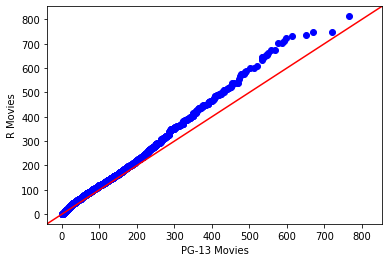

In [45]:
pg_thirteen_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'PG-13']['num_critic_for_reviews'])
pg_thirteen_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), pg_thirteen_movies_critic_reviews))
pg_thirteen_movies_critic_reviews = sm.ProbPlot(np.array(pg_thirteen_movies_critic_reviews))

r_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'R']['num_critic_for_reviews'])
r_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), r_movies_critic_reviews))
r_movies_critic_reviews = sm.ProbPlot(np.array(r_movies_critic_reviews))

qqplot_2samples(pg_thirteen_movies_critic_reviews, r_movies_critic_reviews, xlabel='PG-13 Movies', ylabel='R Movies', line='45')
plt.show()

The number of critic reviews for PG-13 and R-rated movies seem to come from the same distribution since the curve is close to the 45 degree line. However, R-rated movies seem to have slightly different tail behavior. The number of critic reviews for R-rated movies are higher than the corresponding values for PG-13 movies. The differences start increasing from values 300 to 700.

# Q4

### Now we pay our attention to movies that are rated as 'G'.  Generate a scatter plot on the number of critic reviews and the number of user reviews. Use colors to show the IMDb scores. What insights can you get from the plot?

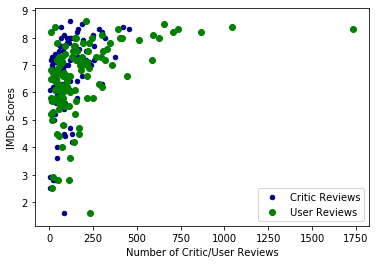

In [46]:
g_movies = movies.loc[movies['content_rating'] == 'G']

ax1 = g_movies.plot.scatter(x='num_critic_for_reviews', y='imdb_score', c='DarkBlue', label='Critic Reviews')
ax1.scatter(x=g_movies['num_user_for_reviews'], y=g_movies['imdb_score'], color='g', label='User Reviews') 
ax1.set_xlabel('Number of Critic/User Reviews')
ax1.set_ylabel('IMDb Scores')
ax1.legend()

For most amounts of critic and user reviews, there is a wide range for IMDb scores, with most movies having scores over 5. The number of user reviews has more outliers, and there is a wider range of number of user reviews than critic reviews. For the outlier movies with many reviews (over 500 reviews), they all have high IMDb scores (7 or higher). 